In [3]:
#Prediction of Sales for the next month on the basis of given dataset 

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [5]:
#1.Data Analysis

In [6]:
item_categories= pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")

In [7]:
item_categories.head()


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
items= pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")

In [9]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
sample_submission = pd.read_csv("../input/competitive-data-science-predict-future-sales/sample_submission.csv")

In [11]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [12]:
#Traing data 
train= pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
#2.EDA

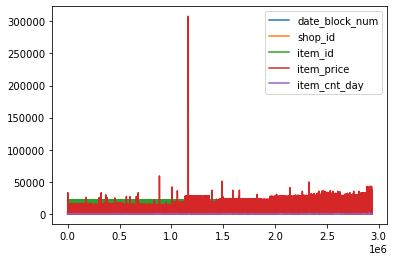

In [14]:
train.plot()

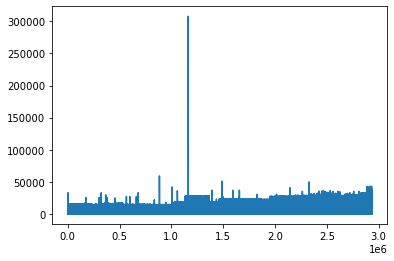

In [15]:
train["item_price"].plot()

In [16]:
test =pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


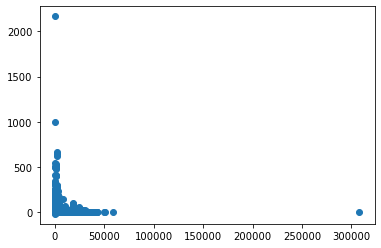

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x="item_price",y="item_cnt_day", data= train, marker='o')
plt.show()

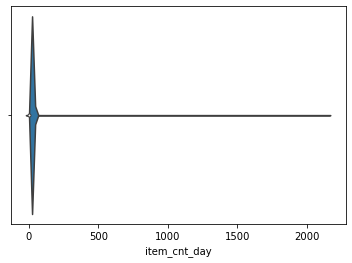

In [22]:
import seaborn as sns


ax = sns.violinplot(x=train["item_cnt_day"])

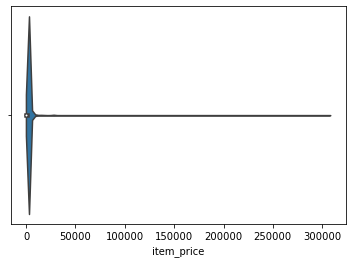

In [23]:
ax = sns.violinplot(x=train["item_price"])

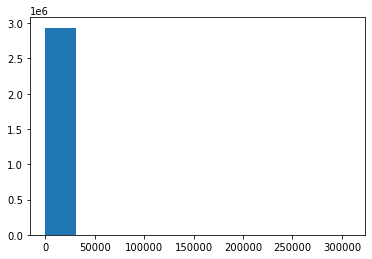

In [24]:
z = plt.hist(x="item_price", data=train)
plt.show()

In [25]:
train["item_price"].max()

307980.0

In [26]:
test_shops = test.shop_id.unique()
train = train[train.shop_id.isin(test_shops)]
test_items = test.item_id.unique()
train = train[train.item_id.isin(test_items)]

In [27]:
test_shops

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [28]:
train["date_block_num"].max()

33

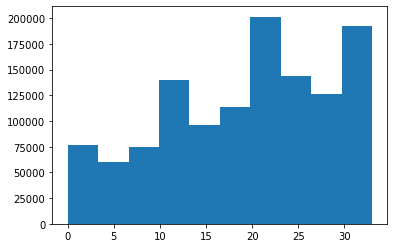

In [29]:
z = plt.hist(x="date_block_num", data=train)
plt.show()

In [30]:
#3.Tranforamton of data

In [31]:
train['date'] = pd.to_datetime(train['date'],format = '%d.%m.%Y')

In [32]:
train.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
10,2013-01-03,0,25,2574,399.0,2.0
11,2013-01-05,0,25,2574,399.0,1.0


In [33]:
# Plot of Pivot data using required features from dataset
data= train.pivot_table(index=['shop_id','item_id'], values=['item_cnt_day'],columns=['date_block_num'], fill_value=0, aggfunc='sum')
data.reset_index(inplace=True)
#Set indices so that data can be easily manipulated

In [34]:
data.head(10)

shop_id item_id item_cnt_day                       ...        \
date_block_num                            0  1  2  3  4  5  6  7  ... 24 25   
0                    2      30            0  0  1  0  0  1  0  0  ...  0  0   
1                    2      31            0  4  1  1  0  0  0  0  ...  0  0   
2                    2      32            0  0  0  0  0  0  0  0  ...  0  0   
3                    2      33            1  0  0  0  0  0  0  0  ...  0  1   
4                    2      53            0  0  0  0  0  0  0  0  ...  0  1   
5                    2      59            0  0  0  0  0  0  0  0  ...  0  1   
6                    2      67            0  0  0  0  0  0  0  0  ...  1  1   
7                    2      70            0  0  0  0  0  0  0  0  ...  0  0   
8                    2      76            0  0  0  0  0  0  0  0  ...  0  0   
9                    2     464            0  0  0  1  0  0  1  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  1  
2               1  0  0  0  0  1  0  0  
3               0  1  1  0  1  0  1  0  
4               0  0  0  0  0  0  0  0  
5               0  0  0  0  0  0  0  0  
6               0  0  0  0  0  0  0  0  
7               0  1  0  0  0  1  0  0  
8               0  0  0  0  0  0  0  0  
9               0  0  2  0  0  0  0  0  

[10 rows x 36 columns]

In [35]:
#Left join is performed to keep the data which is needed to predict
data =pd.merge(test,data,on=["item_id", 'shop_id'],how='left')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3884: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [36]:
data.head(10)

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
6,6,5,5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
7,7,5,5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8,5,5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0
9,9,5,5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.fillna(0,inplace=True)
data.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data.drop(['shop_id', 'item_id',"ID"], inplace=True, axis=1)

In [39]:
data.head(10)

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#4.Splitting train and test data

In [41]:
# Train and test dataset
X_train =np.expand_dims(data.values[:,:-1], axis=2)
y_train= data.values[:,-1]
X_test =np.expand_dims(data.values[:,1:], axis=2)
print(X_train.shape,y_train.shape, X_test.shape)

(214200, 33, 1) (214200,) (214200, 33, 1)


In [42]:
#5.Chossing method for prediction

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
# from extra_keras_datasets import emnist
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [44]:
model_lstm = Sequential()
model_lstm.add(LSTM(units =64,input_shape =(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))
model_lstm.compile(loss= "mse", optimizer='adam', metrics= ['mean_squared_error'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [45]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size=4096,epochs=10)

Epoch 1/10
53/53 [==============================] - 20s 378ms/step - loss: 30.5379 - mean_squared_error: 30.5379
Epoch 2/10
53/53 [==============================] - 20s 378ms/step - loss: 30.2044 - mean_squared_error: 30.2044
Epoch 3/10
53/53 [==============================] - 20s 383ms/step - loss: 30.0168 - mean_squared_error: 30.0168
Epoch 4/10
53/53 [==============================] - 21s 401ms/step - loss: 29.8555 - mean_squared_error: 29.8555
Epoch 5/10
53/53 [==============================] - 21s 391ms/step - loss: 29.8469 - mean_squared_error: 29.8469
Epoch 6/10
53/53 [==============================] - 21s 389ms/step - loss: 29.6974 - mean_squared_error: 29.6974
Epoch 7/10
53/53 [==============================] - 21s 392ms/step - loss: 29.7847 - mean_squared_error: 29.7847
Epoch 8/10
53/53 [==============================] - 23s 431ms/step - loss: 29.5022 - mean_squared_error: 29.5022
Epoch 9/10
53/53 [==============================] - 20s 385ms/step - loss: 29.5928 - mean_square

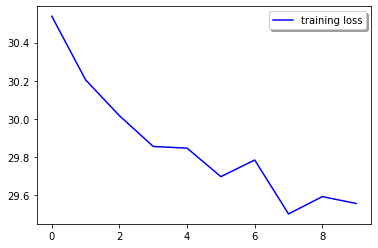

In [46]:
#plot loss and accuracy 
plt.plot(history_lstm.history['loss'],color='b',label="training loss")
plt.legend(loc='best',shadow=True)

In [47]:
submission_file = model_lstm.predict(X_test)
submission_file = submission_file.clip(0,20)
submission = pd.DataFrame({'ID' : test['ID'], 'item_cnt_month':submission_file.ravel()})
submission.to_csv('sub_file.csv',index=False, header=1)

In [70]:
submission.head()

,ID,item_cnt_month
0,0,0.442090
1,1,0.160762
2,2,0.818602
3,3,0.199013
4,4,0.160762


In [61]:
submission['item_cnt_month'].max()

17.358362197875977

In [96]:
submission.groupby(['ID'])['item_cnt_month'].transform(max) 

0         0.442090
1         0.160762
2         0.818602
3         0.199013
4         0.160762
            ...   
214195    0.418457
214196    0.160762
214197    0.160283
214198    0.160762
214199    0.136179
Name: item_cnt_month, Length: 214200, dtype: float32